In [1]:
%matplotlib inline

In [2]:
import cv2 

import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from jasons_skeletonize_from_array import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from erosion_dilation_from_array import *

# from generate_waypoints import *

from inverse_skeletonize_from_array import *

from overlay_images import *

from zig_zag_full_image_2 import *

from write_chinese_post_man_from_graph_csv import *

from chinese_post_man_from_graph import *

from skeleton_to_graph_from_array import *

from find_nearest_white import *

import numpy as np

In [3]:
#inputs : boundary image, zig zag skeleton image
# outputs : useful metrics : mean distance to sampled point, max distance from sampled point 

# for point on boundary image -not boundary- 
    # find nearest point on skeleton image
    #calculate distance
    # if distance is > max distance save as max distance
    #distance sum = distance sum + distance
    
#return distance sum, max distance

found image at :  ./Pipeline_july27/e_d_image.png
found image at :  ./Pipeline_july27/zigzag_full.png


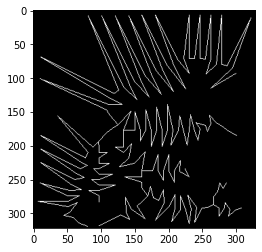

69.87131027825369 7.5632924271105475 93360 706108.9809950407


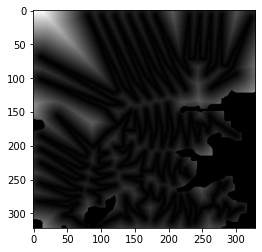

In [15]:
boundary_path = r'./Pipeline_july27/e_d_image.png'
zig_zag_path = r'./Pipeline_july27/zigzag_full.png'
boundary = open_image(boundary_path)
zig_zag = open_image(zig_zag_path) 
show_image(zig_zag)
# print(zig_zag)
# zig_zag_graph = skeleton_to_graph_from_array(zig_zag)

# print (boundary.shape)
distance_graph = boundary # to save the distances at each point
max_distance = 0
distance_sum = 0
points_sum = 0
for i in range(0,boundary.shape[0]):
    for j in range(0, boundary.shape[1]):
        if boundary[i][j] != 0:
            points_sum = points_sum + 1
            nearest_sampled_point = find_nearest_white(zig_zag, [i,j]) #find nearest point on skel
            distance = abs(np.linalg.norm(np.array([i,j])-np.array(nearest_sampled_point))) #calc distance
            
            distance_graph[i][j]=distance # add to new image
            if distance > max_distance : max_distance = distance
            distance_sum = distance_sum + distance
            
print(max_distance,distance_sum/points_sum,points_sum,distance_sum)
show_image(distance_graph)